# Predicting Congenital Disorder
https://www.kaggle.com/c/ga-dat-syd13/data

Author: <div class="LI-profile-badge"  data-version="v1" data-size="medium" data-locale="en_US" data-type="horizontal" data-theme="dark" data-vanity="aroraaman"><a class="LI-simple-link" href='https://au.linkedin.com/in/aroraaman?trk=profile-badge'>Aman Arora</a></div>  

**So, What is a congenital disorder?** <br> 
Most babies are born healthy, but when a baby has a condition that is present from birth, it is called a congenital disorder. Congenital disorders can be inherited or caused by environmental factors and their impact on a child’s health and development can vary from mild to severe. A child with a congenital disorder may experience a disability or health problems throughout life. (https://www.pregnancybirthbaby.org.au/what-is-a-congenital-disorder)

**Here are some of the resources that I referenced before creating this notebook:**<br>
1. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python 
2. General Assembly, Sydney - Linear Regression iPython Notebook -
Authors: Kevin Markham (Washington, D.C.), Ed Podojil (New York City); <br>
Taught by: **Dima Galat** (https://www.linkedin.com/in/dimagalat/)
5. https://www.booktopia.com.au/multivariate-data-analysis-joe-f-hair/prod9781292021904.html?source=pla&gclid=EAIaIQobChMIpJ2qkJLO3QIV16mWCh3RBAFUEAQYASABEgL39vD_BwE (MultiVariate Data Analysis)
6. https://www-bcf.usc.edu/~gareth/ISL/ Introduction to Statistical Learning (James et al., 2014)
7. https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda
8. https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
9. https://www.kaggle.com/apapiu/regularized-linear-models

### Importing Libraries

In [1]:
#Getting the toolkit together
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.preprocessing import StandardScaler
plt.style.use("fivethirtyeight")
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,\
                            roc_curve,roc_auc_score,classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

### Understanding the Data

In [2]:
#importing data
train_path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/health-diagnostics-train.csv'
health_df =pd.read_csv(train_path)

# importing data
test_path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/health-diagnostics-test.csv'
health_df_test =pd.read_csv(test_path)

In [3]:
#how does it look like
print('train:' + str(health_df.shape))

train:(32670, 10)


In [4]:
#Features
health_df_test.columns

Index(['income', 'maternal', 'fam-history', 'mat-illness-past', 'suppl',
       'mat-illness', 'meds', 'env', 'lifestyle', 'Target'],
      dtype='object')

Our **target variable** this time is 'target', how convenient! Doesn't seem like there is a need to rename any of the column names.

In [5]:
health_df.dtypes

income              object
maternal            object
fam-history         object
mat-illness-past    object
suppl               object
mat-illness         object
meds                object
env                 object
lifestyle           object
target               int64
dtype: object

All are string except target? Does that sound right? Let's look further!

In [6]:
health_df.head()

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,target
0,4,0,0,0,4,1,0,0,2,0
1,2,0,0,0,2,2,3,3,3,0
2,3,1,0,0,5,0,0,0,2,0
3,4,1,0,#NULL!,3,0,1,1,2,0
4,2,0,0,0,1,0,0,0,0,0


In [7]:
health_df.sample(5)

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,target
19927,4,0,0,0,5,0,0,0,2,0
24123,2,1,0,0,4,0,0,0,2,0
3921,4,0,0,0,4,0,0,0,2,0
27529,2,1,0,0,3,0,0,3,3,0
24303,1,#NULL!,0,0,3,0,0,0,2,0


Is it perhaps because of this '#NULL!' which is shown by Excel, pandas is reading the data type of the columns as ab object? Let's find out!

In [8]:
print("Percentage NAs for features in training dataset : " + str((health_df.isnull().values.sum()/health_df.isnull().count().values.sum())*100)+'%')

Percentage NAs for features in training dataset : 0.0%


Ah, so it says, **0%"** of the data is missing value, but we know that #NULL! is Null. Let's replace this with a np.NaN value to make things easier for us and for Python as well. 

In [9]:
health_df.replace('#NULL!', np.NaN, inplace = True)
health_df_test.replace('#NULL!', np.NaN, inplace = True)

In [10]:
print("Percentage NAs for features in training dataset : " + str((health_df.isnull().values.sum()/health_df.isnull().count().values.sum())*100)[:4]+'%')
print("Percentage NAs for features in training dataset : " + str((health_df_test.isnull().values.sum()/health_df_test.isnull().count().values.sum())*100)[:4]+'%')

Percentage NAs for features in training dataset : 0.82%
Percentage NAs for features in training dataset : 10.5%


So, not a lot of NULL values, that is good! We want this. Let's have a individual columns and see how they are in terms of Null Values.

In [11]:
print("Total NAs for features in training dataset : " + '\n' + \
      str((health_df.isnull().sum()).sort_values(ascending = False)))

Total NAs for features in training dataset : 
fam-history         906
income              706
mat-illness         224
maternal            221
mat-illness-past    209
meds                187
suppl               163
lifestyle            52
env                  27
target                0
dtype: int64


In [12]:
health_df_test.isnull().sum()

income                90
maternal              20
fam-history           90
mat-illness-past      20
suppl                  9
mat-illness           17
meds                  14
env                    2
lifestyle              4
Target              3569
dtype: int64

I have tried different combinations of imputing data and dropping data already while working on this exercise. It makes sense to impute the mode() in missing values as these are categorical features. However, imputing in test with mode() and dropping train values gives maximum accuracy. <br>
Why? Well, first of all we have over 30,000 values in train data. Losing 900 is approx 3% of the data. This data is not unique and exists for target == 0, that is, our majority class. We are not missing the minority class, therefore, it is safe to drop this data in Train. For our test data, we cannot drop any data and therefore, we will be imputing with mode(). 

In [13]:
##In order to test for null values
null_index = []
for row in health_df_test.index:
    if health_df_test.iloc[row,:].isnull().any():
        null_index.append(row)

In [14]:
health_df_test.iloc[null_index,:].sample(5)

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,Target
2289,5,0,0,0,4,2,1,0,0,NaN
457,3,0,0,0,2,0,0,0,1,NaN
173,2,0,0,0,4,0,0,0,0,NaN
723,3,1,0,0,2,0,0,0,1,NaN
2717,3,0,0,0,3,1,0,0,3,NaN


In [15]:
#convert to numeric dtype
for col in health_df.columns[:-1]:
    health_df[col] = health_df[col].astype(float, errors = 'raise')
    
for col in health_df_test.columns:
    health_df_test[col] = health_df_test[col].astype(float, errors = 'raise')

**Dropping and imputing NULL Values**

In [16]:
health_df.dropna(inplace = True)
health_df_test = health_df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [17]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30435 entries, 0 to 32669
Data columns (total 10 columns):
income              30435 non-null float64
maternal            30435 non-null float64
fam-history         30435 non-null float64
mat-illness-past    30435 non-null float64
suppl               30435 non-null float64
mat-illness         30435 non-null float64
meds                30435 non-null float64
env                 30435 non-null float64
lifestyle           30435 non-null float64
target              30435 non-null int64
dtypes: float64(9), int64(1)
memory usage: 2.6 MB


In [18]:
#clear case of imbalance
health_df['target'].value_counts()

0    30376
1       59
Name: target, dtype: int64

**99.819% of the time, the born child is a healthy child, while only 0.001% of the time, a child is born with congenital disorder. Interesting..** <br>
This is a classic case of class imbalance. After having done my research there are a few ways to tackle class imbalance - I tried them all as part of this exercise. <br>
- Resampling (Oversampling the minority Class, undersampling the majority class, SMOTE, or combinations) 
- Adding Class Weights to increase penalty of misclassifying minority class
- Ensemble of multiple Models to combine many weak classifiers to have strong classifier

**Train Test Split**

In [19]:
X = health_df.loc[:, health_df.columns != 'target']
y = health_df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)

### Resampling

**Undersampling**

In [21]:
def perform_undersampling(proportion_of_negative_to_positive):
    #get positive,negative indices and select random majority class to create balanced data
    num_of_positive_case = len(health_df[health_df['target'] == 1])
    positive_case_indices = health_df[health_df['target'] == 1].index
    negative_case_indices = health_df[health_df['target'] == 0].index
    
    #select random from majority class based on ratio
    random_indices = np.random.choice(negative_case_indices,
                                      num_of_positive_case*proportion_of_negative_to_positive, 
                                      replace=False)
    
    under_sample_indices = np.concatenate([positive_case_indices,random_indices])
    under_sampled_data = health_df.loc[under_sample_indices]
    
    print('Shape of undersampled data:', under_sampled_data.shape)
    print('Number of Positive Cases of class 1:', num_of_positive_case)
    print('Number of Negative Cases of class 0:', num_of_positive_case*proportion_of_negative_to_positive)

    return under_sampled_data

In [22]:
undersampled_data = perform_undersampling(1)

Shape of undersampled data: (118, 10)
Number of Positive Cases of class 1: 59
Number of Negative Cases of class 0: 59


Now that we have undersampled the data, let's apply a a prediction to predict X_test and use CV to select best model. 

In [23]:
def cv(model_list):
    for model in model_list:
        clf = model
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        print('AUC score:', auc_score, 'for model:',clf)
        plt.figure()
        plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        ##Title and label
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()

AUC score: 0.4997530457688508 for model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


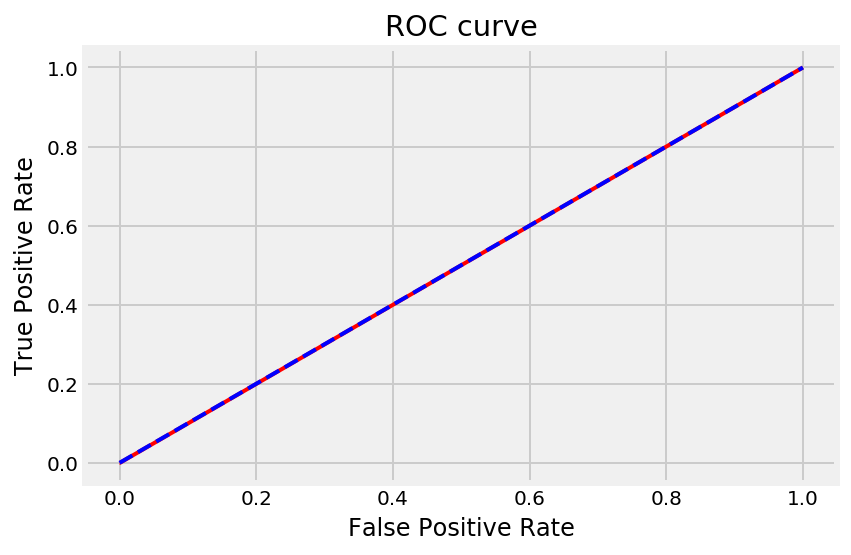

AUC score: 0.5 for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


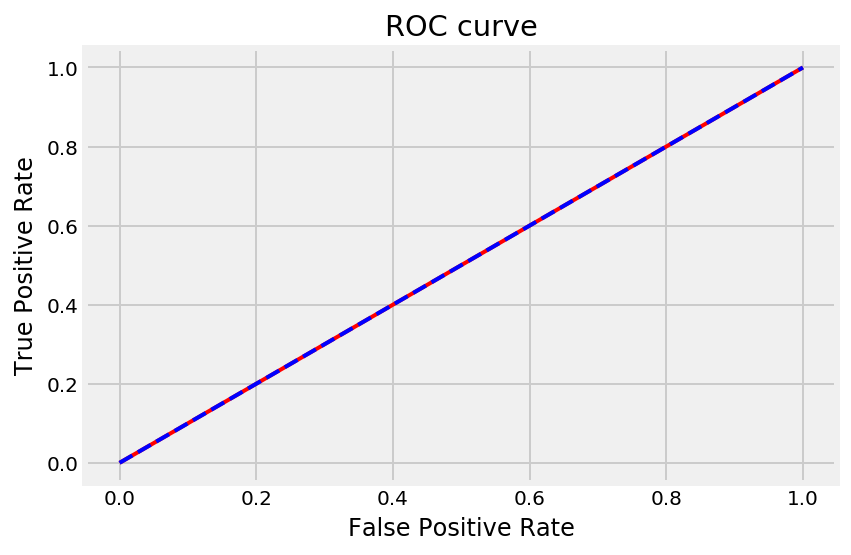

AUC score: 0.5 for model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


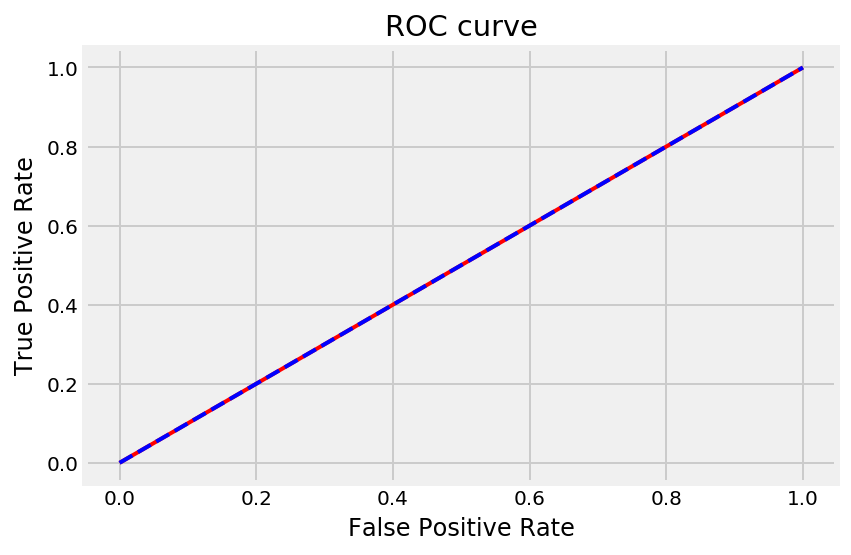

In [24]:
model_list = [RandomForestClassifier(),LogisticRegression(),SVC()]
cv(model_list)

**Oversampling**

In [25]:
ros = RandomOverSampler()
X_ros_train, y_ros_train = ros.fit_sample(X_train, y_train)

print(X_ros_train.shape[0] - X_train.shape[0], 'new random points created for minority class.')

24256 new random points created for minority class.


In [26]:
def cv(model_list):
    for model in model_list:
        clf = model
        clf.fit(X_ros_train,y_ros_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        print('AUC score:', auc_score, 'for model:',clf)
        plt.figure()
        plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        ##Title and label
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()

AUC score: 0.47234112611129403 for model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


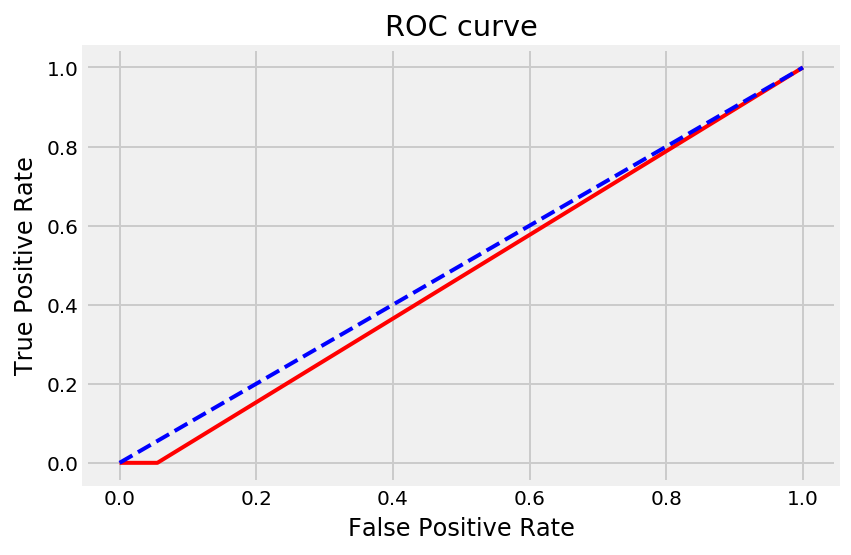

AUC score: 0.7853017907347839 for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


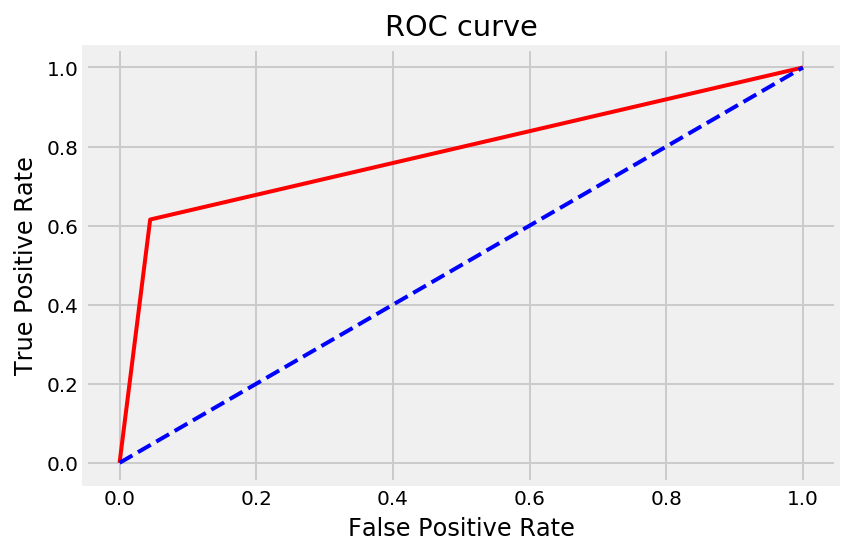

AUC score: 0.639111218054254 for model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


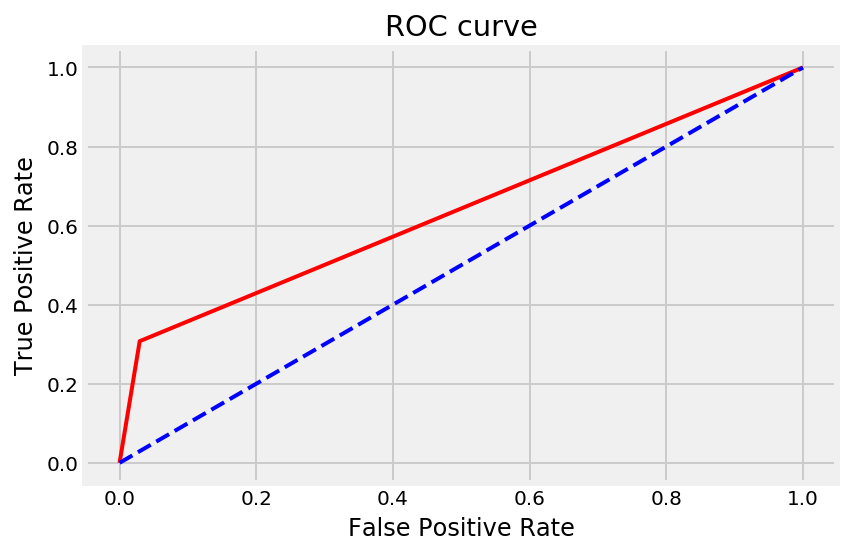

In [27]:
model_list = [RandomForestClassifier(),LogisticRegression(),SVC()]
cv(model_list)